<h2 style="color:blue">Library Imports</h2>

In [1]:
import pandas as pd
import os
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Downloading stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevzm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevzm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h2 style="color:blue">Exploratory Data Analysis (EDA)</h2>

<h3 style="color:blue">i. Loading the Dataset</h3>

In [2]:
# Load the dataset
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv('Dataset/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=columns)

In [3]:
# Map sentiment labels: 0 for negative, 4 for positive
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

In [4]:
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Optional: Subsetting the dataset to include only 'sentiment' and 'text' columns
df = df[['sentiment', 'text']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1048576 non-null  int64 
 1   text       1048576 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [7]:
df.describe()

,sentiment
count,1.048576e+06
mean,2.370605e-01
std,4.252799e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


<h3 style="color:blue">ii. Text Preprocessing</h3>

In [8]:
processed_data_file = 'Sentiment140_processed.csv'

# Check if the processed data file exists
if os.path.exists(processed_data_file):
    # Load the processed data
    df = pd.read_csv(processed_data_file)
    print("Processed data loaded successfully.")
else:
    # If the file doesn't exist, preprocess the data
    def preprocess_text(text):
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
        text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
        text = text.lower()  # Convert to lowercase
        tokens = word_tokenize(text)  # Tokenize the text
        filtered_words = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(filtered_words)
    
    # Apply preprocessing to the text column
    df['text'] = df['text'].apply(preprocess_text)
    
    # Save the processed data for future use
    df.to_csv(processed_data_file, index=False)
    print("Data preprocessed and saved successfully.")

Processed data loaded successfully.


In [9]:
# Dropping rows with NaN values in the text column
df.dropna(subset=['text'], inplace=True)

In [10]:
# Check if the pre-processed dataset exists
processed_dataset_path = 'Sentiment140_processed.csv'
if os.path.exists(processed_dataset_path):
    df = pd.read_csv(processed_dataset_path)
    print("Loaded pre-processed dataset.")
else:
    # If not, perform preprocessing as done in the cell above
    columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
    df = pd.read_csv('Dataset/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=columns)
    df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
    df = df[['sentiment', 'text']]
    df['text'] = df['text'].apply(preprocess_text)
    df.to_csv(processed_dataset_path, index=False)
    print("Processed and saved dataset.")

Loaded pre-processed dataset.


<h3 style="color:blue">iii. Class Distribution</h2>

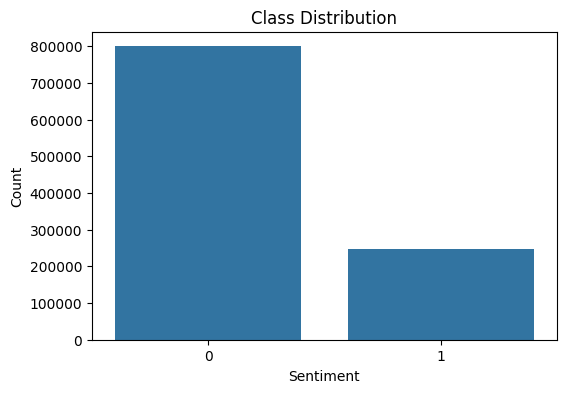

In [11]:
# Plotting the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
# Filling NaN values with an empty string
df['text'] = df['text'].fillna('')

<h3 style="color:blue">iv. Word Cloud for Positive and Negative Sentiments</h3>

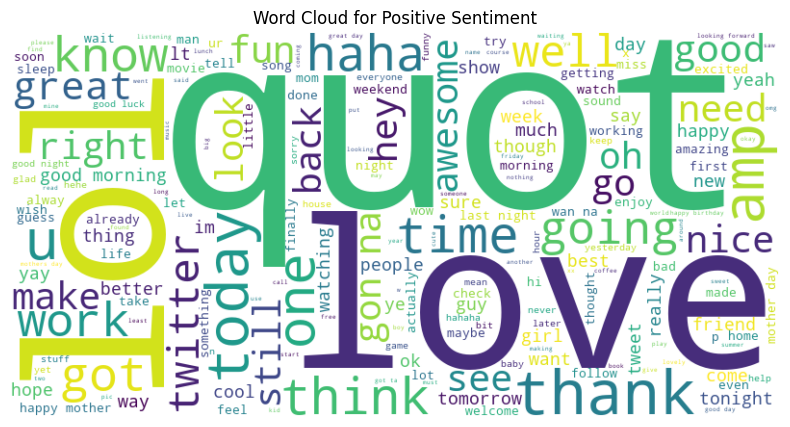

In [13]:
# Creating a Word cloud for positive sentiment
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

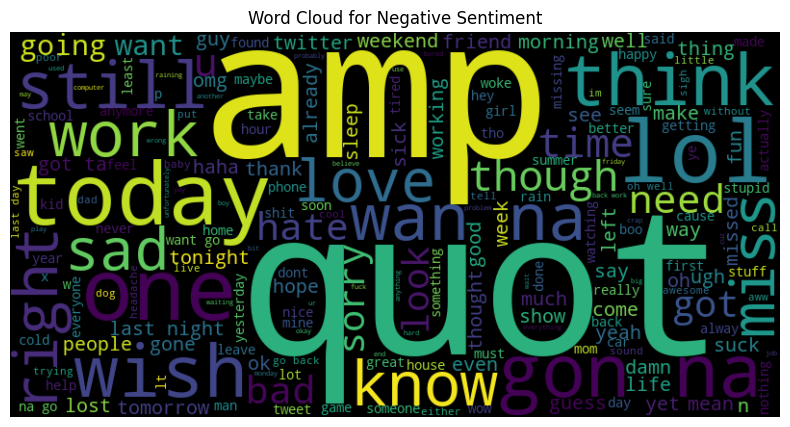

In [14]:
# Creating a Word cloud for negative sentiment
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

In [15]:
from collections import Counter

# Printing the most common words
def print_most_common_words(text, n=20):
    words = text.split()
    word_counts = Counter(words)
    print(f"Most common {n} words:")
    for word, count in word_counts.most_common(n):
        print(f"{word}: {count}")

print("Positive sentiment:")
print_most_common_words(positive_text)
print("\nNegative sentiment:")
print_most_common_words(negative_text)

Positive sentiment:
Most common 20 words:
good: 20238
day: 16803
quot: 14555
love: 14075
like: 11737
thanks: 11340
get: 10876
lol: 10740
time: 9574
today: 9539
u: 9484
got: 9458
going: 9421
go: 8474
one: 8322
great: 8322
happy: 8141
know: 8096
amp: 7974
see: 7899

Negative sentiment:
Most common 20 words:
go: 45579
get: 45542
work: 45398
like: 41047
day: 39862
got: 38594
today: 38119
going: 33685
back: 33075
really: 31498
miss: 30712
im: 30660
want: 29865
still: 29264
good: 29205
sad: 27916
time: 27519
one: 27263
know: 26314
quot: 26154


<h3 style="color:blue">v. Text Length Analysis</h3>

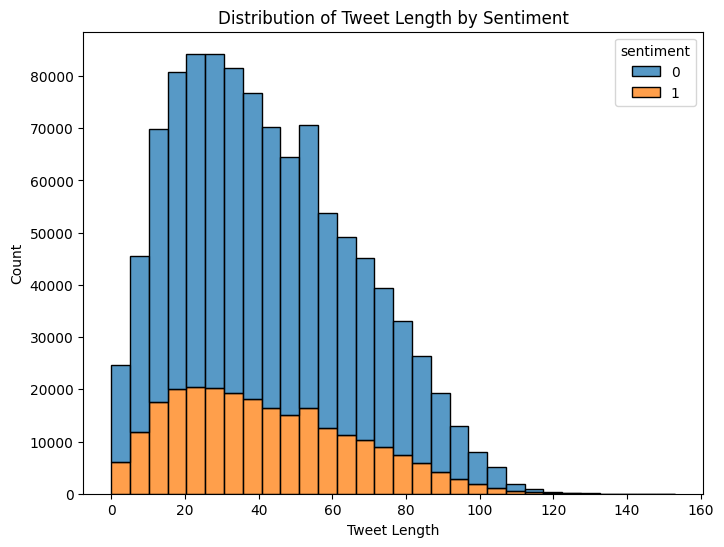

In [16]:
# Adding a column for text length
df['text_length'] = df['text'].apply(len)

# Plotting text length distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='text_length', hue='sentiment', multiple='stack', bins=30)
plt.title('Distribution of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

<h3 style="color:blue">vi. Feature Engineering (Converting Text to Numerical Data) & Data Pre-processing</h3>

In [17]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [18]:
# Vectorizing the text data
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:
# Saving the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

<h3 style="color:blue">vii. Handling Class Imbalance</h3>

In [20]:
# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

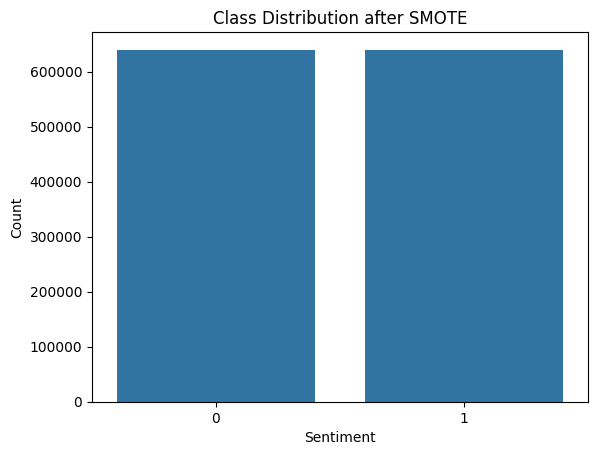

In [21]:
# Checking the new class distribution
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [22]:
# Saving the processed dataset to a CSV file
processed_dataset_path = 'Sentiment140_processed.csv'
df.to_csv(processed_dataset_path, index=False)

print(f"Processed dataset saved to {processed_dataset_path}")

Processed dataset saved to Sentiment140_processed.csv


<h2 style="color:blue">Model Selection and Training</h2>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

In [25]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

<h2 style="color:blue">Model Evaluation</h2>

In [26]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")

evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, nb_pred, "Naive Bayes")

Logistic Regression Performance:
Accuracy: 0.8288
Precision: 0.7152
Recall: 0.4612
F1-Score: 0.5608


Naive Bayes Performance:
Accuracy: 0.8039
Precision: 0.8386
Recall: 0.2133
F1-Score: 0.3400




The best model is Logistic Regression with an accuracy of 82.88%
Best model saved as 'best_model.pkl'


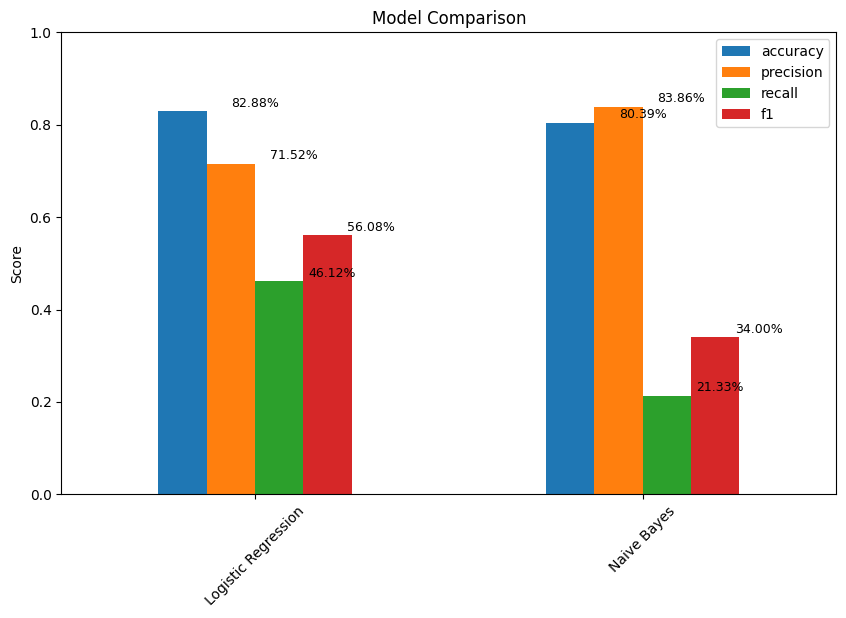

In [27]:
# Defining a function to plot model performance and save the best model
def plot_model_performance(models, X_test, y_test):
    results = {}
    best_model_name = None
    best_accuracy = 0
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        results[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
        
        # Check if this model is the best based on accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_model = model

    # Print and save the best model
    print(f"The best model is {best_model_name} with an accuracy of {best_accuracy * 100:.2f}%")
    joblib.dump(best_model, 'best_model.pkl')
    print(f"Best model saved as 'best_model.pkl'")

    # Plotting the performance metrics
    metrics_df = pd.DataFrame(results).T
    metrics_df.plot(kind='bar', figsize=(10,6))
    
    # Show percentages on top of the bars
    for i, row in enumerate(metrics_df.values):
        for j, val in enumerate(row):
            plt.text(i + j * 0.1, val + 0.01, f'{val * 100:.2f}%', ha='center', fontsize=9)
    
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

# Assuming models have been trained as shown before
models = {'Logistic Regression': lr_model, 'Naive Bayes': nb_model}
plot_model_performance(models, X_test_tfidf, y_test)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

    Negative       0.85      0.94      0.89    160027
    Positive       0.72      0.46      0.56     49688

    accuracy                           0.83    209715
   macro avg       0.78      0.70      0.73    209715
weighted avg       0.82      0.83      0.81    209715

Confusion Matrix for Logistic Regression:



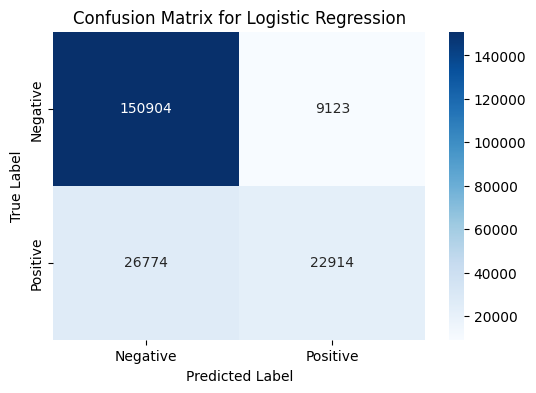

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

    Negative       0.80      0.99      0.88    160027
    Positive       0.84      0.21      0.34     49688

    accuracy                           0.80    209715
   macro avg       0.82      0.60      0.61    209715
weighted avg       0.81      0.80      0.76    209715

Confusion Matrix for Naive Bayes:



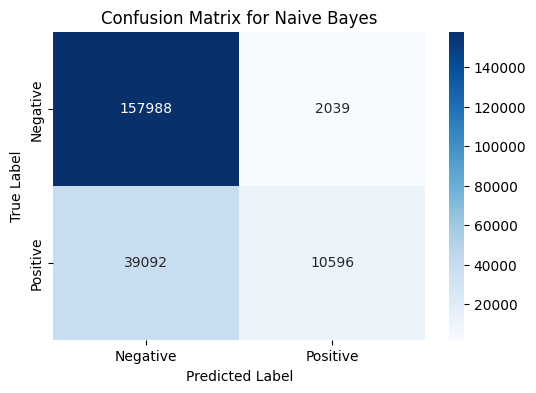

In [28]:
# Defining a function to visualize confusion matrices
def visualize_confusion_matrices(models, X_test, y_test):
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        
        # Classification report
        print(f"Classification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
        
        # Confusion matrix
        print(f"Confusion Matrix for {model_name}:\n")
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot the confusion matrix using seaborn heatmap
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Assuming models have been trained as shown before
models = {'Logistic Regression': lr_model, 'Naive Bayes': nb_model}
visualize_confusion_matrices(models, X_test_tfidf, y_test)

In [29]:
#Evaluate After SMOTE
# Logistic Regression on balanced data
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
lr_pred = lr_model.predict(X_test_tfidf)

# Naive Bayes on balanced data
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)
nb_pred = nb_model.predict(X_test_tfidf)

# Evaluating Logistic Regression performance
print("Logistic Regression:")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Evaluating Naive Bayes performance
print("Naive Bayes:")
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Logistic Regression:
[[126657  33370]
 [ 13558  36130]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84    160027
           1       0.52      0.73      0.61     49688

    accuracy                           0.78    209715
   macro avg       0.71      0.76      0.72    209715
weighted avg       0.81      0.78      0.79    209715

Naive Bayes:
[[126197  33830]
 [ 14133  35555]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84    160027
           1       0.51      0.72      0.60     49688

    accuracy                           0.77    209715
   macro avg       0.71      0.75      0.72    209715
weighted avg       0.81      0.77      0.78    209715

